# Multi Agent PlayGround

In [1]:
from tqdm import tqdm

from simulation import Triple, Agent, AgentModel

In [2]:
sim_configs = {
    "gt_validation_ratio": .8,  # Percentage of triples that have a grounds truth validated (it's a canon triple)
    "triple_validation_reward": 1,  # Value of triple
    "triple_validation_slash": 1,  # Value of triple
    "triple_submission_reward": 5,  # 
    "triple_submission_slash": 1,  #  


    # Agent State variables
    "number_of_agents": 10,  # Number of agents, these agents will be submitting and validating triples
    "initial_token_amount": 100,  # Initial stake
    "initial_reputation": 0,  # Initial reputation
    "validation_rate": 60,  # Validation rate per second
    "submission_rate": 180,  # Submission rate per second

    # Sim Model variables
    "time_frame": 60*60*60,  # Running for 8 hours
}

### Single Run

In [3]:
model = AgentModel(**sim_configs)
for i in tqdm(range(sim_configs["time_frame"])):
    model.step()

100%|██████████| 216000/216000 [00:43<00:00, 4928.02it/s]


### Bar Graphs

#### Tokens Earned

<BarContainer object of 10 artists>

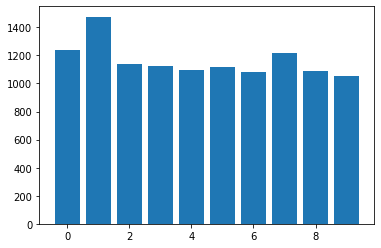

In [4]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_earned_tokens = [a.tokens_earned for a in model.schedule.agents]
plt.bar(x=list(range(sim_configs["number_of_agents"])),height=agent_earned_tokens)

<BarContainer object of 10 artists>

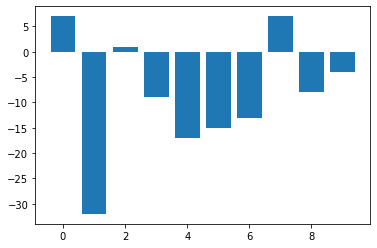

In [5]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_earned_tokens = [a.staked_tokens for a in model.schedule.agents]
plt.bar(x=list(range(sim_configs["number_of_agents"])),height=agent_earned_tokens)

### Graphs Overtime

In [6]:
tokens_earned = model.datacollector.get_agent_vars_dataframe()

<AxesSubplot:xlabel='Step,AgentID'>

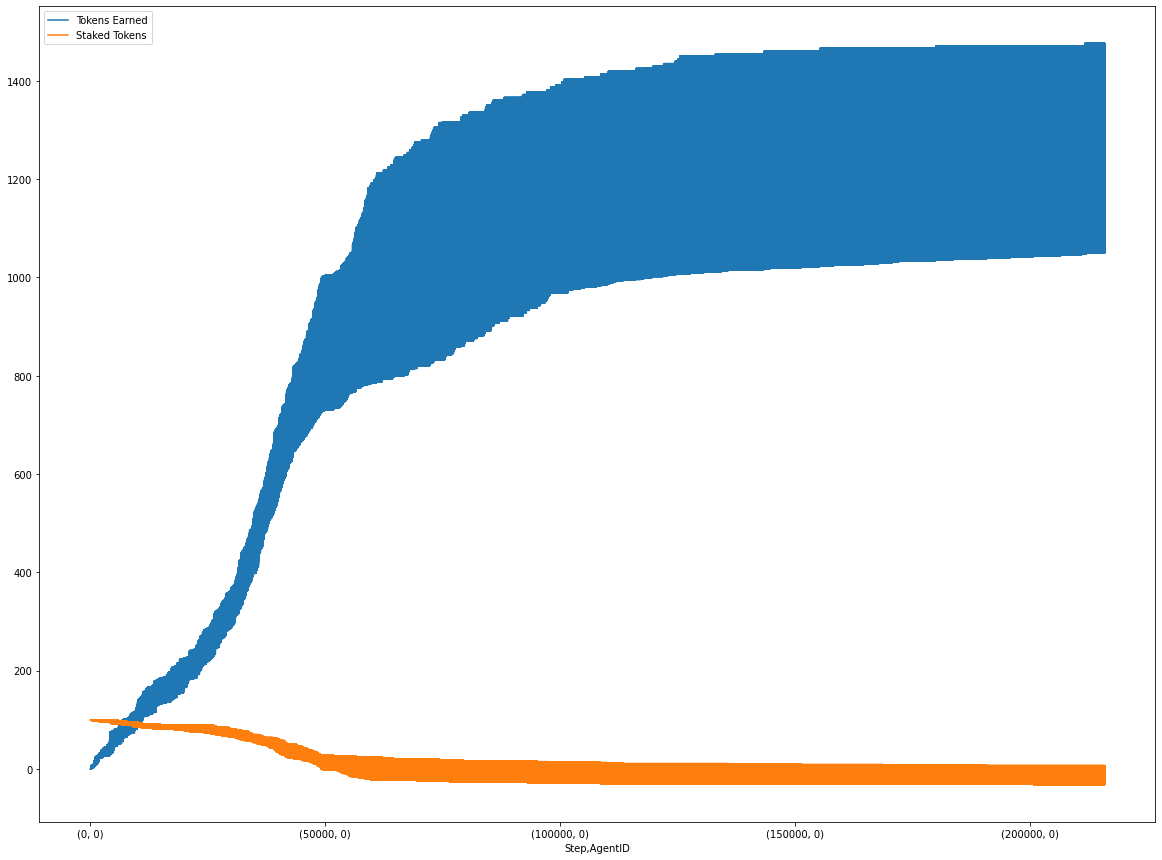

In [7]:
tokens_earned.plot(figsize=(20,15))

In [8]:
model_data = model.datacollector.get_model_vars_dataframe()

<AxesSubplot:>

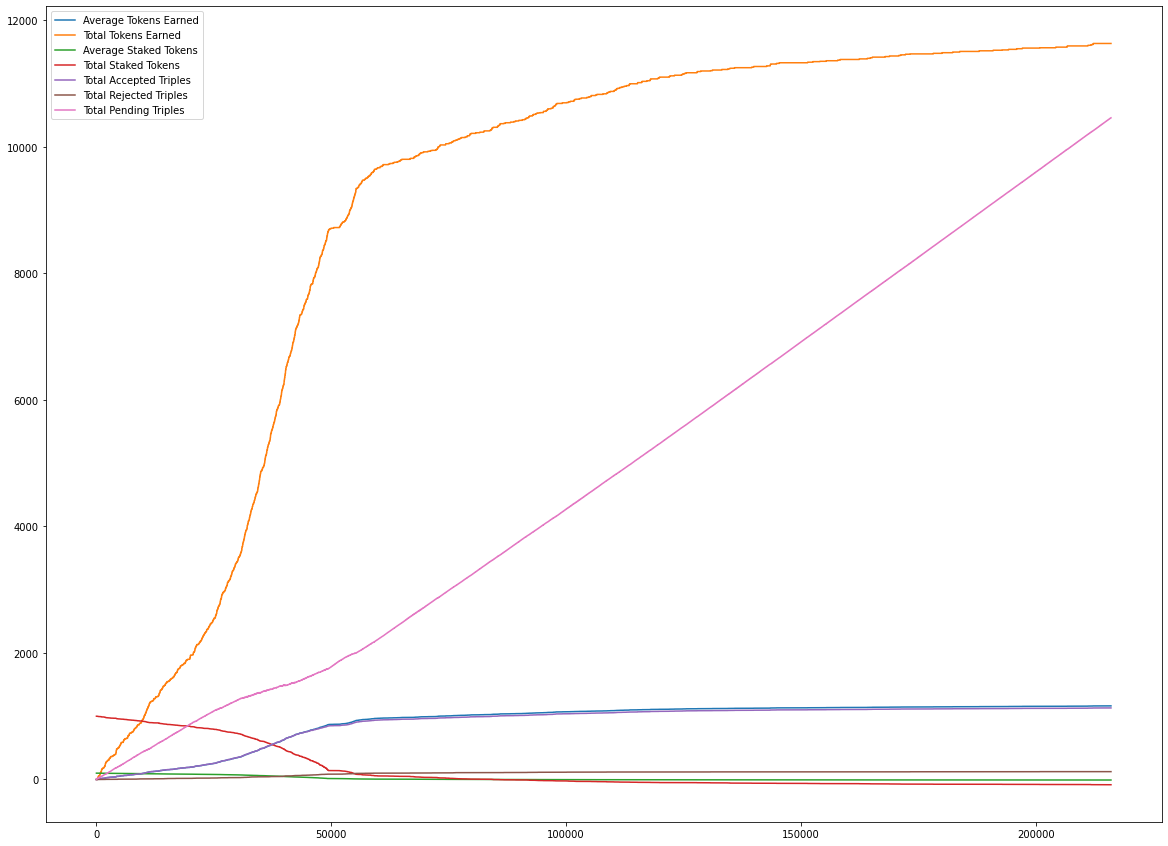

In [9]:
model_data.plot(figsize=(20,15))

100%|██████████| 216000/216000 [00:17<00:00, 12113.66it/s]


(array([0., 0., 0., ..., 0., 0., 1.]),
 array([   0,    1,    2, ..., 1575, 1576, 1577]),
 <BarContainer object of 1577 artists>)

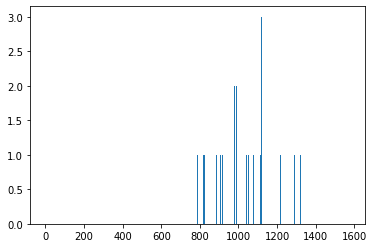

In [11]:
all_tokens_earned = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(10):
    # Run the model
    model = AgentModel(**sim_configs)
    for i in tqdm(range(sim_configs["time_frame"])):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_tokens_earned.append(agent.tokens_earned)

plt.hist(all_tokens_earned, bins=range(max(all_tokens_earned) + 1))